# Movie Recommender Systems By DataLux 


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Problem Statement</a>

<a href=#three>3. Importing Packages</a>

<a href=#four>4. Loading Data</a>

<a href=#five>5. Data Preprocessing</a>

<a href=#six>6. Exploratory Data Analysis (EDA)</a>

<a href=#seven>7. Feature Engineering</a>

<a href=#eight>8. Modeling</a>

<a href=#nine>9. Model Performance 

<a href=#eleven>10. Model Explanations and Conclusion</a>
 
<a href=#ten>11. Comet Session</a>

<a href=#twelve>12. Appendix</a>

<a id = "one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

If you have ever used a streaming website like Netflix, Showmax, or Youtube, a fter watching a movie, the platform begins suggesting more films and TV series of a similar kind. This is an illustration of a recommendation system. Recommender systems  recognize a user's viewing habits and offer pertinent advice. Recommender systems are economically and socially essential in today's technologically advanced world to enable people to make the best decisions possible regarding the information they consume on a daily basis. This is particularly true in the context of movie recommendations, where clever algorithms may guide viewers toward excellent films among tens of thousands of possibilities.

The task is to develop a collaborative filtering or content-based recommendation algorithm that can correctly forecast how a user would evaluate a film they haven't yet seen based on their past preferences.

Offering a precise and reliable solution to this problem has enormous economic potential since users will receive personalized suggestions, creating platform affinity for streaming services that make it easiest for their audience to watch.

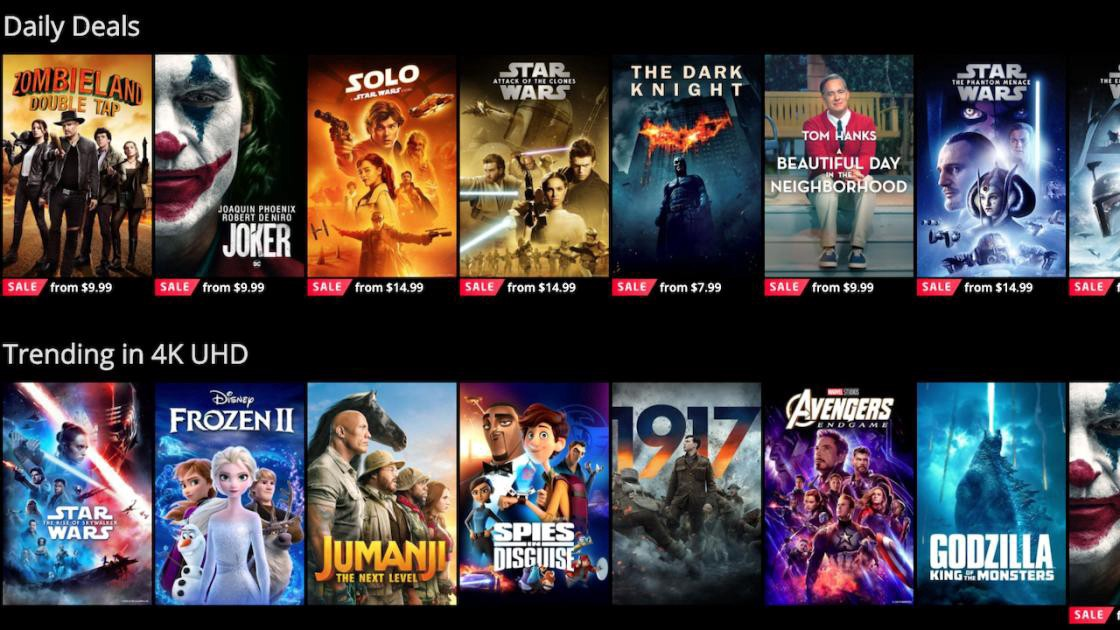

<a id = "two"></a>
## 2. Problem Statement
<a href=#cont>Back to Table of Contents</a>

The goal is to create a collaborative filtering system or content-based recommendation algorithm that can accurately predict a user's evaluation of a movie they haven't seen based on their past preferences.

In [1]:
pip install comet_ml

  Using cached wurlitzer-3.0.2-py3-none-any.whl (7.3 kB)Note: you may need to restart the kernel to use updated packages.



  Using cached nvidia_ml_py3-7.352.0-py3-none-any.whl
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl (15 kB)
  Using cached everett-3.0.0-py2.py3-none-any.whl (35 kB)
  Using cached requests_toolbelt-0.9.1-py2.py3-none-any.whl (54 kB)
  Using cached websocket_client-1.3.3-py3-none-any.whl (54 kB)
  Using cached configobj-5.0.6-py3-none-any.whl


Initiate one experiment per model each time by running the above cell and this cell below

In [2]:
# Please skip this cell when running the notebook
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="1wJBkwGmGzfiNzCD8TIHqmW7d",
    project_name="team-es3-unsupervised-learning",
    workspace="engrchyke",)

C:\Users\CHIBUIKEM EFUGHA\AppData\Roaming\Python\Python39\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\CHIBUIKEM EFUGHA\\Documents\\ES3 Project' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.com/engrchyke/team-es3-unsupervised-learning/88accc0071f6426381e8e0d41881d6c4




 <a id="three"></a>
## 3. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import json
import re
import squarify


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing
from time import time
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse.linalg import svds


# Models
from surprise import model_selection
from surprise import Reader, Dataset
from surprise import SVD,SVDpp, NormalPredictor, BaselineOnly, NMF, SlopeOne, CoClustering
from sklearn.metrics.pairwise import cosine_similarity
from surprise.model_selection import cross_validate
from sklearn.metrics.pairwise import cosine_similarity
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split

# Performance Evaluation
from surprise import accuracy
from surprise.accuracy import rmse


# Display
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")
pd.set_option('display.max_columns', 37)


from IPython.display import display_html 
from IPython.core.display import HTML
from collections import defaultdict
from datetime import datetime

        
# Visualisation
import matplotlib.pyplot as plt 
sns.set_style("darkgrid")
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
py.init_notebook_mode(connected = True)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


<a id="four"></a>
## 4. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
#Reading all the given data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('tags.csv')
imdb = pd.read_csv('imdb_data.csv')
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')

### Brief Description of the Datasets
- genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
- genome_tags.csv - user assigned tags for genome-related scores
- imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- sample_submission.csv - Sample of the submission format for the hackathon.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

**The code below will help to reduce the memory allocation to the different dataset in order to prevent running out of limited memory space.**

In [4]:
def reduce_mem_usage(train_data):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = train_data.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in train_data.columns:
        col_type = train_data[col].dtype

        if col_type != object:
            c_min = train_data[col].min()
            c_max = train_data[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    train_data[col] = train_data[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    train_data[col] = train_data[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    train_data[col] = train_data[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    train_data[col] = train_data[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    train_data[col] = train_data[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    train_data[col] = train_data[col].astype(np.float32)
                else:
                    train_data[col] = train_data[col].astype(np.float64)
        else:
            train_data[col] = train_data[col].astype('category')

    end_mem = train_data.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return train_data

In [5]:
reduce_mem_usage(train)

Memory usage of dataframe is 305.18 MB
Memory usage after optimization is: 133.52 MB
Decreased by 56.2%


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
...,...,...,...,...
10000033,136395,99114,5.0,1521235092
10000034,140078,553,3.0,1002580977
10000035,154807,56782,4.0,1227674807
10000036,85805,327,4.0,1479921530


In [6]:
reduce_mem_usage(test)

Memory usage of dataframe is 76.29 MB
Memory usage after optimization is: 38.15 MB
Decreased by 50.0%


,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318
...,...,...
5000014,162541,4079
5000015,162541,4467
5000016,162541,4980
5000017,162541,5689


In [8]:
reduce_mem_usage(genome_scores)

Memory usage of dataframe is 356.70 MB
Memory usage after optimization is: 118.90 MB
Decreased by 66.7%


,movieId,tagId,relevance
0,1,1,0.028748
1,1,2,0.023743
2,1,3,0.062500
3,1,4,0.075745
4,1,5,0.140747
...,...,...,...
15584443,206499,1124,0.109985
15584444,206499,1125,0.048492
15584445,206499,1126,0.013252
15584446,206499,1127,0.140259


In [9]:
reduce_mem_usage(links)

Memory usage of dataframe is 1.43 MB
Memory usage after optimization is: 0.71 MB
Decreased by 50.0%


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0


In [10]:
# Declaring a list that contains the names of the dataframes
df_list = [train, test,imdb, movies, tags]
# Create a list of the names of the imported datasets
df_names = ['train', 'test', 'genome_scores', 'genome_tags','links',
            'imdb',  'movies', 'tags']
#Zipping the data list and data names together.
df_dataset = zip(df_names, df_list)
#creating an empty dictionary to get the total number of observations and features available in different dataset.
dfs_dict = {}
for name, data in df_dataset:
    dfs_dict[name] = [data.shape[0], data.shape[1]]
    df_prop = pd.DataFrame(dfs_dict,
                          index=['rows', 'columns']).T
df_prop = df_prop.sort_values(by='rows', ascending=False)

#view the final output
df_prop 

,rows,columns
train,10000038,4
test,5000019,2
links,1093360,4
genome_tags,62423,3
genome_scores,27278,6


In [11]:
#previewing our train dataset
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [13]:
#previewing our test dataset
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


<a id="four"></a>
## 5. Data Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

**Data Types and Missing Values**

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int32  
 1   movieId    int32  
 2   rating     float16
 3   timestamp  int32  
dtypes: float16(1), int32(3)
memory usage: 133.5 MB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int32
 1   movieId  int32
dtypes: int32(2)
memory usage: 38.1 MB


In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [16]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


From executing the .info() method on both train and test sets we can see that:

The train dataset has over 10 million observations with 3 integer and 1 float columns

The test dataset has over 5 million observations with 2 columns that are integers

The movies dataset has over 62 thousand observations with 1 integer and 2 object columns.

The imdb dataset has over 27 thousand observations with 4 object, 1 float and 1 integer column.

**Checking for Missing Values** 

In [17]:
#checking for null values in the train dataset
train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [18]:
#checking for null values in the test dataset
test.isnull().sum()

userId     0
movieId    0
dtype: int64

In [19]:
#checking for null values in the movies dataset
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [20]:
#checking for null values in the imdb dataset
imdb.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [21]:
#checking for null values in the genome_scores dataset
genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [22]:
#checking for null values in the genome_tags dataset
genome_tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [23]:
#checking for null values in the tags dataset
tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [24]:
imdb.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

**Observations**

The links dataset has 107 missing values in the tmdb column. This makes up for a total of only 0.17% of missing data.

The tags dataset has 16 missing values in the tag column. This makes up for a total of only 0.00015% of the missing data

The imdb_data dataset has a range of missing values, this would be analysed further.

**Analysis of imdb_data**

The plot below is a visual representation of the different columns in the imdb dataset with their percentage of missing values.
There is a high number of movies without budget, director or title cast. Such high proportions of missing data largely disqualifies this particular set from our current modelling task.

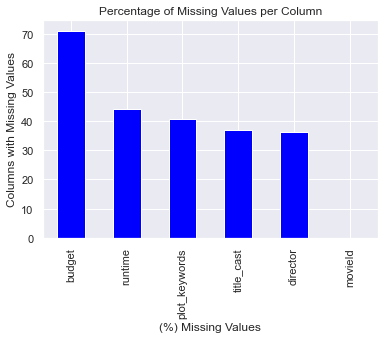

In [10]:
# The percentage of each column of missing values
total = imdb.isnull().sum().sort_values(ascending=False)
percent_1 = (imdb.isnull().sum()/imdb.isnull().count())*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2],
                         axis=1, keys=['Total', '(%) missing'])
missing_data['(%) missing'].plot(kind='bar', color = 'blue')
plt.xlabel('(%) Missing Values')
plt.ylabel('Columns with Missing Values')
plt.title('Percentage of Missing Values per Column')
plt.show()

From the above graph, it is observed that the budget column has the highest number of missing values of over 70% but due to the information in the column having the major missing values, it won't be removed because it won't have major effect on our recommender system, obviously no one will be interested in the budget of a movie before he/she will watch the movie. 

Also, from the analysis, movieId column had no missing value, this could be as a result of the movieId being the unique key column. 

<a id="six"></a>
## 6. Exploratory Data Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

#### Distribution of User Ratings

Average rating in the dataset: 3.5333951730983424


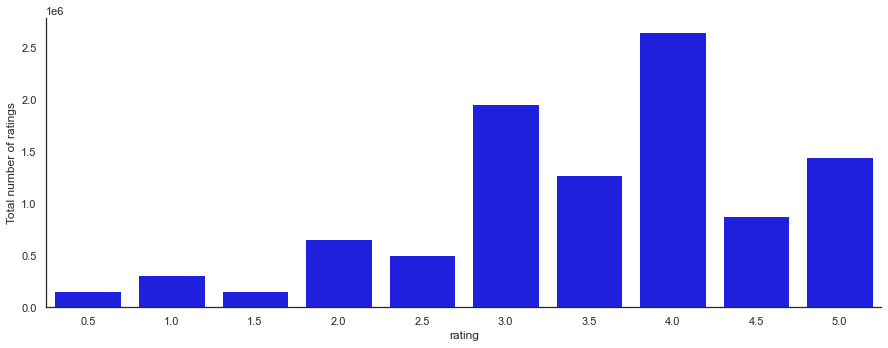

In [4]:
print (f'Average rating in the dataset: {np.mean(train["rating"])}')

with sns.axes_style('white'):
    g = sns.factorplot("rating", data=train, aspect=2.5, kind='count', color = 'blue')
    g.set_ylabels("Total number of ratings")

### Observation
From the graph above, it shows that most movies have a rating of 4.0, followed by 3.0 rating while the least rated movies by individuals were rated 0.5 and 1.5. Also the mean rating was about 3.5, this reveals that the distribution is left skewed which indicates that most movies are rated well by the users and therefore these movies with this ratings will have a meaningful impact for our model to recommend such movies.

In [7]:
# Storing the years from the titles separately:

# We specify the parantheses so we don’t conflict with movies that have years in their titles
movies["year"] = movies.title.str.extract("\((\d{4})\)", expand=True)
# Removing the parentheses
movies["year"] = movies.year.str.extract("(\d\d\d\d)", expand=True)
# Removing the years from the ‘title’ column
movies["title"] = movies.title.str.replace("(\(\d\d\d\d\))", "")
# Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies["title"] = movies["title"].apply(lambda x: x.strip())

In [8]:
# Removing the character separating the genres for each movie
movies['genres'] = movies['genres'].str.replace('|',' ')
movies["genres"] = movies["genres"].str.replace('(', ' ', regex=True)
movies["genres"] = movies["genres"].str.replace(')', ' ', regex=True)
movies.head(10)

,movieId,title,genres,year
0,1,Toy Story,Adventure Animation Children Comedy Fantasy,1995
1,2,Jumanji,Adventure Children Fantasy,1995
2,3,Grumpier Old Men,Comedy Romance,1995
3,4,Waiting to Exhale,Comedy Drama Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
5,6,Heat,Action Crime Thriller,1995
6,7,Sabrina,Comedy Romance,1995
7,8,Tom and Huck,Adventure Children,1995
8,9,Sudden Death,Action,1995
9,10,GoldenEye,Action Adventure Thriller,1995


Above table now have the years movies were produced separate from the title

In [9]:
# Removing the same character for the imdb_data:
imdb['title_cast'] = imdb['title_cast'].str.replace('|',' ')
imdb['plot_keywords'] = imdb['plot_keywords'].str.replace('|',' ')
imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter,81.0,"$30,000,000",toy rivalry cowboy cgi animation
1,2,Robin Williams Jonathan Hyde Kirsten Dunst Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game adventurer fight game
2,3,Walter Matthau Jack Lemmon Sophia Loren Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat lake neighbor rivalry
3,4,Whitney Houston Angela Bassett Loretta Devine ...,Terry McMillan,124.0,"$16,000,000",black american husband wife relationship betra...
4,5,Steve Martin Diane Keaton Martin Short Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood doberman dog mansion


In [30]:
# Combining both train and movies datasets by using movieId
# as the matching column between both datasets
train_movies_df = pd.merge(train,
                           movies,
                           how='left',
                           on='movieId')
metadata_df = pd.merge(train_movies_df, imdb, how = 'left', on = 'movieId')
# Calculating the mean rating per movie
train_movies_df1 = metadata_df[['title','rating']].groupby('title').mean().sort_values('rating', ascending=False)
train_movies_df1.head()

,rating
title,
Oblivion Verses,5.0
Raffles,5.0
The Rival,5.0
I Just Wanna Hug You,5.0
The Game,5.0


In [31]:
train_movies_df1['No_of_ratings'] = train_movies_df.groupby('title')['rating'].count()

In [32]:
train_movies_df1.sort_values(by=['No_of_ratings', 'rating'],
                          ascending=False).head()

,rating,No_of_ratings
title,,
"Shawshank Redemption, The",4.417969,32831
Forrest Gump,4.046875,32383
Pulp Fiction,4.195312,31697
"Silence of the Lambs, The",4.144531,29444
"Matrix, The",4.152344,29014


This table shows that the best movies are those with high number of ratings as they have been rated highly by large quantities of people.

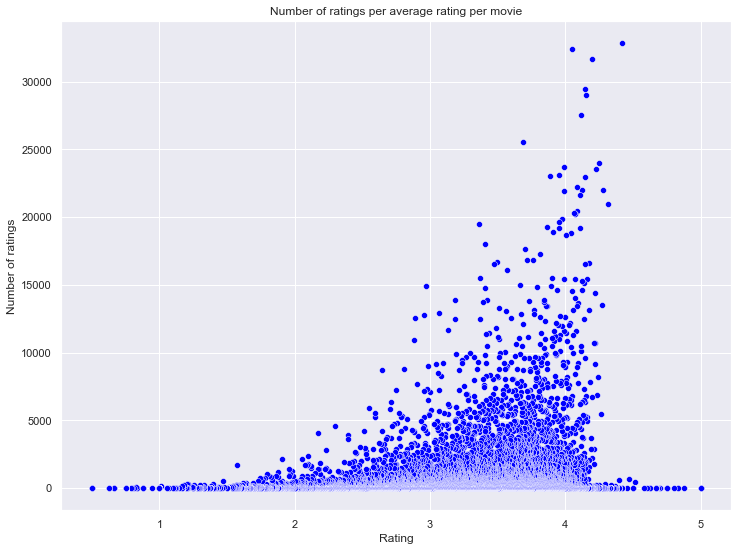

In [33]:
# Set plot size
sns.set(rc={'figure.figsize':(12,9)})

# Plot Number of rating for every rating category.
sns.scatterplot(x='rating', y='No_of_ratings', data=train_movies_df1, color = 'blue')
plt.title('Number of ratings per average rating per movie')
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.show()

The above scatterplot shows that there is a strong correlation between the number of ratings a rating-category contains and the rating category, i.e. movies that have more ratings (views) strongly tend to also have higher average ratings. This supports the previously established notion that users tend to give higher ratings in general. The plot below similarly shows that even movies with more than one hundred views (ratings) the average rating stays consistent around 3.5. 

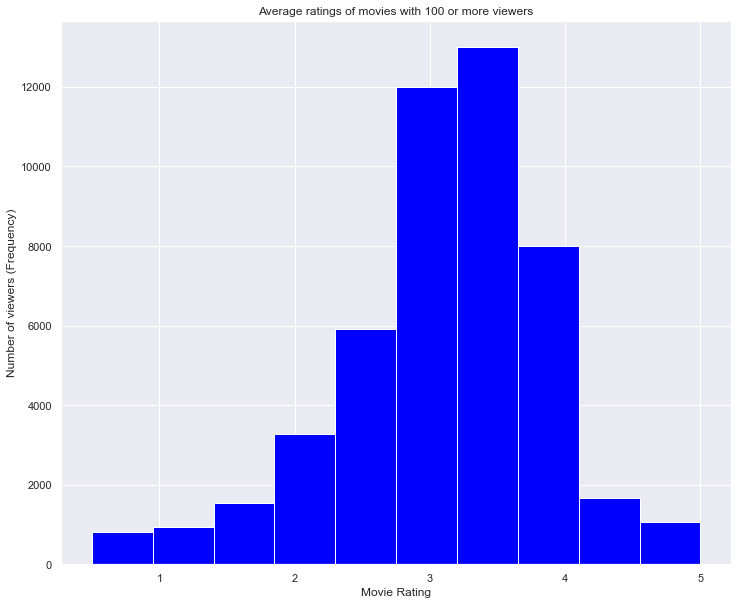

In [34]:
# Plotting the average ratings of movies with 100 or more viewers.
plt.figure(figsize=(12,10))
train.groupby('movieId')['rating'].mean().plot(kind='hist', color = 'blue')
plt.ylabel('Number of viewers (Frequency)')
plt.xlabel('Movie Rating')
plt.title('Average ratings of movies with 100 or more viewers')
plt.show()

So this confirms the hypothesis that movies with more views have a good average ratings

In [35]:
best_director = pd.DataFrame(metadata_df.groupby('director')['rating'].mean().
                             sort_values(ascending=False))
best_director['No_of_ratings'] = metadata_df.groupby('director')['rating'].count()
best_director.sort_values(by=['No_of_ratings', 'rating'], ascending=False).head(10)

,rating,No_of_ratings
director,,
Quentin Tarantino,3.937500,109919
Michael Crichton,3.273438,65157
J.R.R. Tolkien,4.082031,62963
Lilly Wachowski,3.808594,60988
Stephen King,4.050781,59903
Ethan Coen,3.947266,51185
James Cameron,3.687500,51178
Luc Besson,3.750000,44015
Jonathan Nolan,4.101562,42645


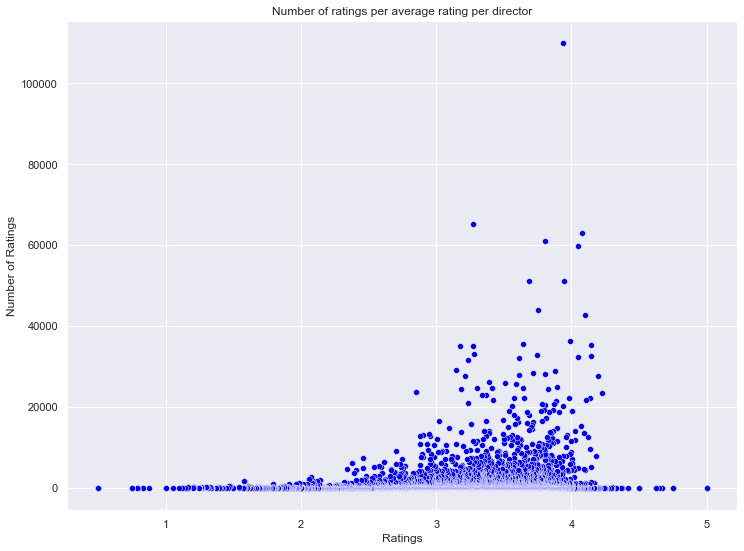

In [36]:
# Set plot size
sns.set(rc={'figure.figsize':(12,9)})

sns.scatterplot(x = 'rating', y = 'No_of_ratings', data = best_director, color = 'blue').set_title('Number of ratings per average rating per director')
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')
plt.show()

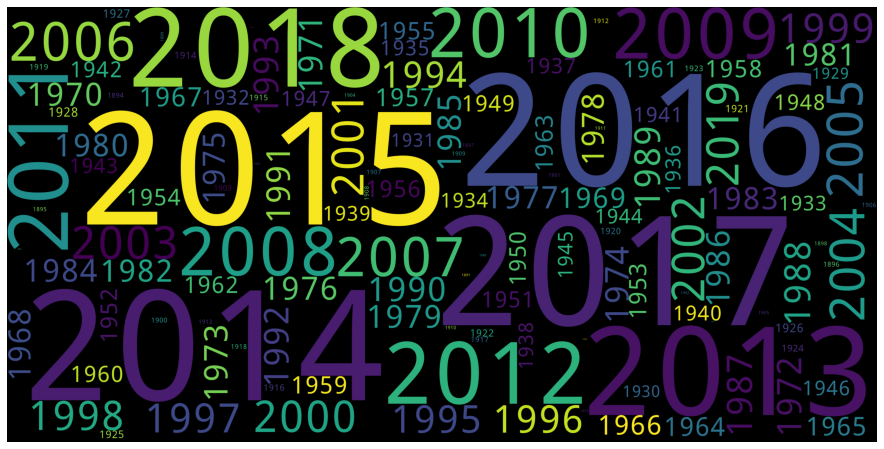

In [38]:
# Generating the wordcolud for the years with the most movies
year_wordcloud = WordCloud(background_color='black', height=2000, width=4000).generate_from_frequencies(movies['year'].value_counts())
plt.figure(figsize=(16,8))
plt.imshow(year_wordcloud)
plt.axis('off')
plt.show()

The wordcloud above similarly displays the most prevalent release years in this dataset.

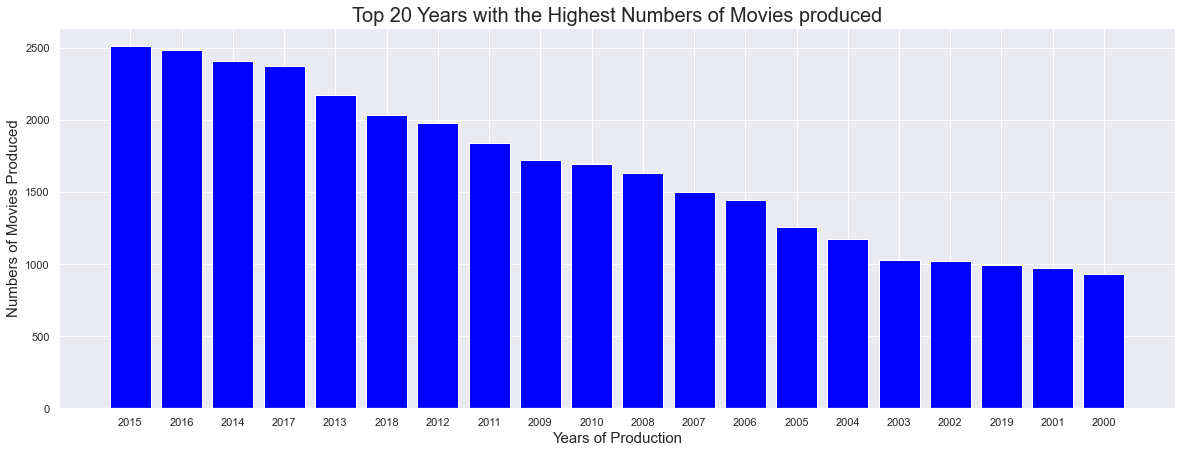

In [39]:
movies["year"] = movies["year"].astype('str')
metadata_year_count = movies["year"].value_counts()
fig, ax = plt.subplots( figsize=(20,7))
ax.bar(metadata_year_count.index[:20], metadata_year_count.values[:20],  facecolor='blue')
ax.set_xlabel("Years of Production", fontsize = 15)
ax.set_ylabel("Numbers of Movies Produced", fontsize = 15)
ax.set_title("Top 20 Years with the Highest Numbers of Movies produced", fontsize = 20)
plt.show()

The above plot shows estimated number of movies produced each year with 2015 having the highest number of movie released per year from the given dataset.This gives us an insight on the years with a good number of movies and also indicating the relevance to recommend recently produced movies.

#### Top Rated Movies
For this section, we want to know the movies that have has a rating of 4 and above. We have considered less than 4 to be average rating.

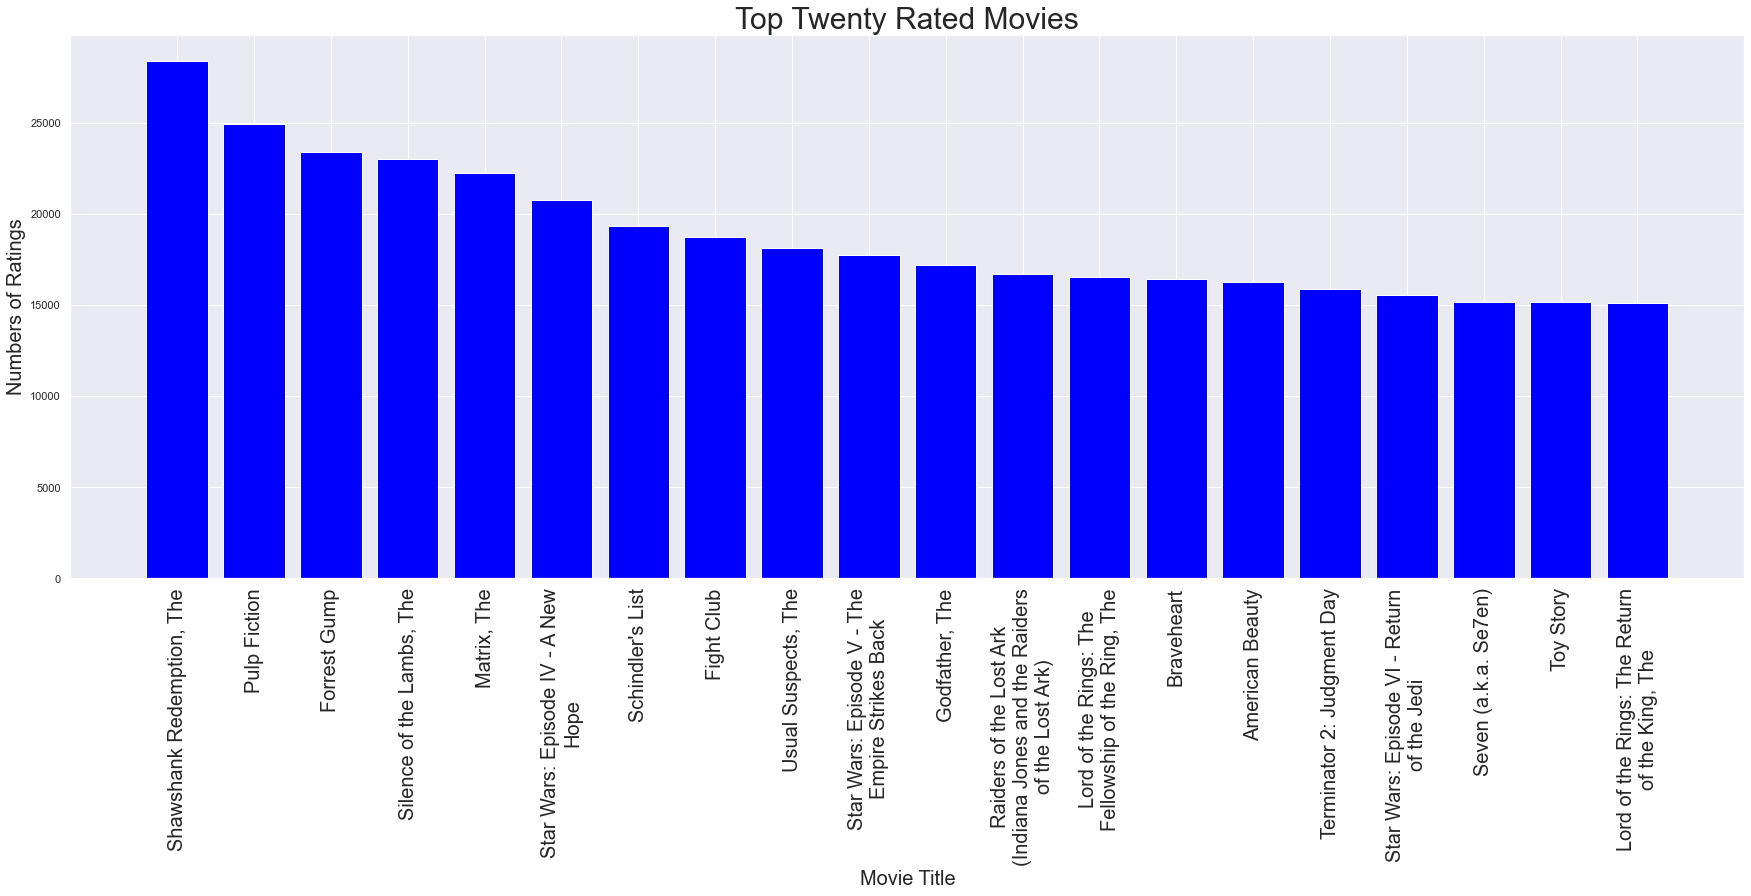

In [40]:
from textwrap import wrap
ratings = train[['movieId','rating']]
ratings = ratings[ratings['rating'] > 3.9]
ratings = ratings.merge(movies, on = 'movieId', how = 'left')


movies_ratings = ratings['title'].value_counts()

labels = [ '\n'.join(wrap(l, 30)) for l in movies_ratings.index[:20]]



fig, ax = plt.subplots( figsize=(30,10))

ax.bar(labels, movies_ratings.values[:20],  color='blue',width = 0.8)
ax.set_xlabel("Movie Title", fontsize = 20)
ax.set_ylabel("Numbers of Ratings", fontsize = 20)
ax.set_title("Top Twenty Rated Movies", fontsize = 30)
plt.xticks(rotation=90, fontsize= 20)
plt.show()

According to the dataset ,Shawshank redemption is the most Popular movie of all time having the highest number of ratings, with the Lord of the rings also making the top 20 list of top rated movies. This informs us on the possibility of our recommender system to account for this top rated movies. Obviously, new users would love to also watch these top rated movies.

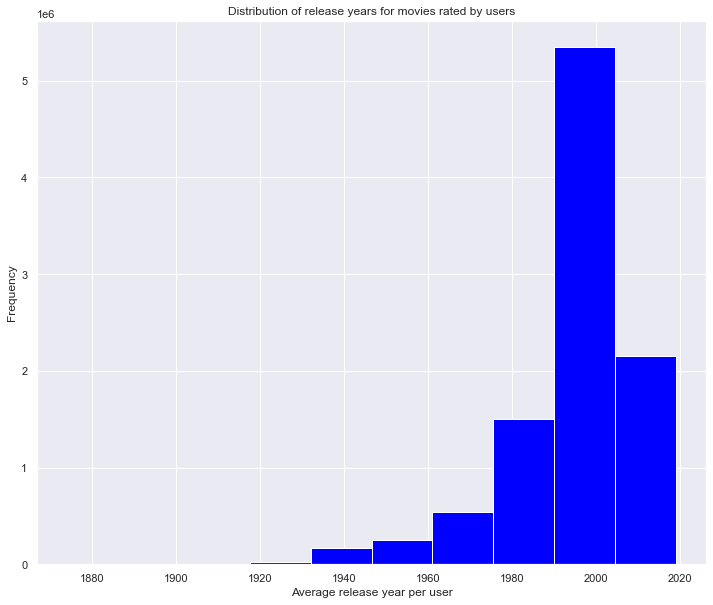

In [42]:
train_df_year = metadata_df[['userId','year']].dropna()
train_df_year['year'] = train_df_year['year'].astype('float')
train_df_year.groupby('userId').mean()

# Set plot size
sns.set(rc={'figure.figsize':(12,9)})

plt.figure(figsize=(12,10))
train_df_year['year'].plot(kind='hist', color ='blue')
plt.ylabel('Frequency')
plt.xlabel('Average release year per user')
plt.title('Distribution of release years for movies rated by users')
plt.show()

The above graph shows the ratings per year (averaged year per user) on this dataset. It illustrated the point that certain users have preferences regarding release year which may be useful when performing predictive modelling.

Next to explore some of the highest-rated movies in this dataset, the timestamp column of the train dataset is converted to date time format, and the years extracted

In [43]:
metadata_df['datetime_of_rating'] = metadata_df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
metadata_df['year_rated'] = metadata_df['datetime_of_rating'].dt.year

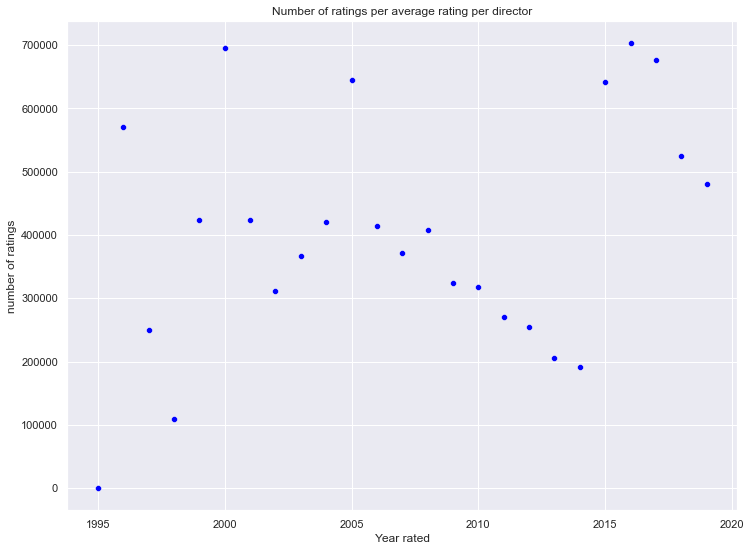

In [44]:
# Group and count ratings by year
year_rated_df = metadata_df[['year_rated','rating']].groupby('year_rated').count()

# Set plot size
sns.set(rc={'figure.figsize':(12,9)})

sns.scatterplot(x = 'year_rated', y = 'rating', data = year_rated_df.reset_index(), color = 'blue').set_title('Number of ratings per average rating per director')
plt.xlabel('Year rated')
plt.ylabel('number of ratings')
plt.show()

From the plot above we can see that all ratings were only created between 1995 and 2020, with no clear correlation between year within that range and number of ratings created/collected.

## Rating timestamp exploration
Further analysis is performed to see whether day of the week (of rating creation/collection) influences the rating itself.

In [45]:
# Convert the timestamp values into date time format
metadata_df['timestamp'] = pd.to_datetime(train['timestamp'], unit='ms')
metadata_df.head()

,userId,movieId,rating,timestamp,title,genres,year,title_cast,director,runtime,budget,plot_keywords,datetime_of_rating,year_rated
0,5163,57669,4.0,1970-01-18 13:45:49.992,In Bruges,Comedy Crime Drama Thriller,2008,Elizabeth Berrington Rudy Blomme Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf bruges irish hitman,2018-02-11 12:53:12,2018
1,106343,5,4.5,1970-01-14 23:03:58.739,Father of the Bride Part II,Comedy,1995,Steve Martin Diane Keaton Martin Short Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood doberman dog mansion,2008-03-23 03:18:59,2008
2,146790,5459,5.0,1970-01-13 10:56:55.539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2),Action Comedy Sci-Fi,2002,Tommy Lee Jones Will Smith Rip Torn Lara Flynn...,Lowell Cunningham,88.0,"$140,000,000",lingerie michael jackson character shorthaired...,2004-02-08 05:45:39,2004
3,106362,32296,2.0,1970-01-17 11:17:22.565,Miss Congeniality 2: Armed and Fabulous,Adventure Comedy Crime,2005,Sandra Bullock Regina King Enrique Murciano Wi...,Marc Lawrence,115.0,"$45,000,000",female protagonist cleave gag good woman fbi,2015-02-04 10:36:05,2015
4,9041,366,3.0,1970-01-10 15:29:35.837,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama Horror Mystery Thriller,1994,Jeff Davis Heather Langenkamp Miko Hughes Matt...,Wes Craven,112.0,"$8,000,000",freddy krueger elm street famous director as h...,1996-05-29 14:17:17,1996


In [46]:
# Extract the days of the week from the timestamp column
metadata_df['day_of_week'] = metadata_df['timestamp'].dt.dayofweek
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
metadata_df['day_of_week'] = metadata_df['day_of_week'].apply(lambda x: days[x])
metadata_df.tail()

,userId,movieId,rating,timestamp,title,genres,year,title_cast,director,runtime,budget,plot_keywords,datetime_of_rating,year_rated,day_of_week
10000033,136395,99114,5.0,1970-01-18 14:33:55.092,Django Unchained,Action Drama Western,2012,Jamie Foxx Christoph Waltz Leonardo DiCaprio K...,Quentin Tarantino,165.0,"$100,000,000",racial vengeance racial violence historically ...,2018-03-16 22:18:12,2018,Sun
10000034,140078,553,3.0,1970-01-12 14:29:40.977,Tombstone,Action Drama Western,1993,Kurt Russell Val Kilmer Sam Elliott Bill Paxto...,Kevin Jarre,130.0,"$25,000,000",wyatt earp character two gun holster double gu...,2001-10-08 23:42:57,2001,Mon
10000035,154807,56782,4.0,1970-01-15 05:01:14.807,There Will Be Blood,Drama Western,2007,Daniel Day-Lewis Martin Stringer Matthew Brade...,Paul Thomas Anderson,158.0,"$25,000,000",oil misanthrope loss of hearing false prophet,2008-11-26 05:46:47,2008,Thur
10000036,85805,327,4.0,1970-01-18 03:05:21.530,Tank Girl,Action Comedy Sci-Fi,1995,Lori Petty Ice-T Naomi Watts Don Harvey Jeff K...,Alan Martin,104.0,"$25,000,000",desert tank 21st century 2030s,2016-11-23 18:18:50,2016,Sun
10000037,139457,1009,4.0,1970-01-10 22:36:24.862,Escape to Witch Mountain,Adventure Children Fantasy,1975,NaN,NaN,NaN,NaN,NaN,1997-03-21 23:54:22,1997,Sat


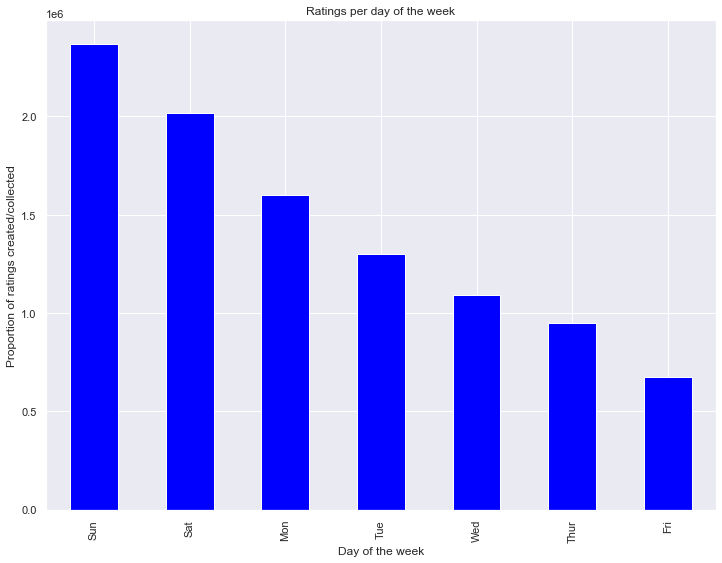

In [47]:
# Plot of the average number of ratings for each day
metadata_df['day_of_week'].value_counts().plot(kind='bar', color = 'blue')
plt.title('Ratings per day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Proportion of ratings created/collected')
plt.show()

**Observation**

The graph above shows that on average, movies were rated more often on Sundays and Saturdays.
A possible explanation is that more people are at home/at the cinema watching movies on Saturdays and Sundays.

**Genre and Tag Exploration**

In [48]:
def tokenizer(data, col):
    """
        This function takes in a dataframe and a col, creates a new column to store the tokenized words
        in the inputed column, and returns a new dataframe.
    """
    df = data.copy()
    tokeniser = TreebankWordTokenizer()
    df['genre_tok'] = df[col].apply(tokeniser.tokenize)
    return df  

In [49]:
# Tokenized genre column
movies = tokenizer(movies, 'genres')
movies.head()

,movieId,title,genres,year,genre_tok
0,1,Toy Story,Adventure Animation Children Comedy Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji,Adventure Children Fantasy,1995,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men,Comedy Romance,1995,"[Comedy, Romance]"
3,4,Waiting to Exhale,Comedy Drama Romance,1995,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II,Comedy,1995,[Comedy]


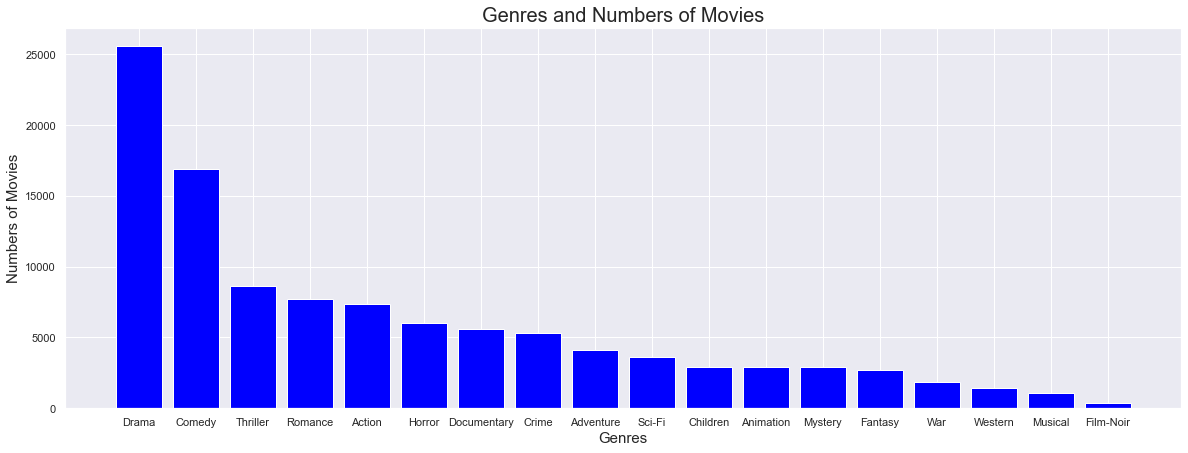

In [51]:
# Collect the tokenized genre in a list form
genres = movies['genre_tok'].values.tolist()
all_genres = []

# Merge the genre values
for index, genre in enumerate(genres):
    all_genres.extend(genre)

genre_df = pd.DataFrame({
    "genre":all_genres
})

genre_df = genre_df[genre_df['genre'].isin(['no', 'listed', 'genres', 'IMAX']) == False]

# Visualise the first twenty years with the highest numbers of movies produced
genre_count = genre_df["genre"].value_counts()
fig, ax = plt.subplots( figsize=(20,7))
ax.bar(genre_count.index, genre_count.values,  facecolor='blue')
ax.set_xlabel("Genres", fontsize = 15)
ax.set_ylabel("Numbers of Movies", fontsize = 15)
ax.set_title("Genres and Numbers of Movies", fontsize = 20)
plt.show()

We can see that majority of the movies in the dataset are Drama and Comedy, then followed by Thriller, Romance and Action while the least of them are Musical and Film-Noir respectively. This shows the categories of genres that people tend to love, the insight from this plot indicates that our client should look out more on movies in the Drama and Comedy genres.

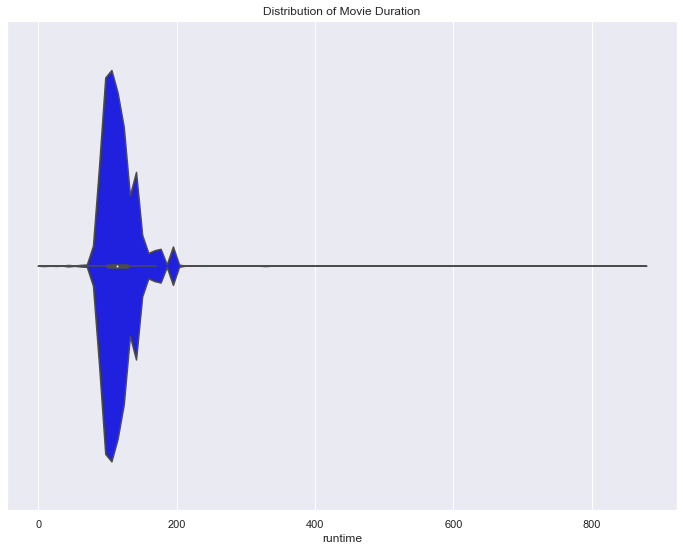

In [52]:
sns.violinplot(x = 'runtime', data = metadata_df,color = 'blue').set_title('Distribution of Movie Duration')
plt.show()

In [53]:
print('runtime mean: ', metadata_df['runtime'].mean())
print('runtime standard deviation: ', metadata_df['runtime'].std())

runtime mean:  116.09646355365558
runtime standard deviation:  24.09290124779007


Most of the runtimes are centered around the mean as shown by the violin plot above and the variation between the length of the movies is quite small, as shown by the standard deviation. There are also a few outliers. Also, realistically speaking, runtime is not really important in determining if a person will watch a movie because if they really do not like watching long movies, they can simply watch it in intervals. But nonethless, in future it will give us an insight to recommend movies based on the runtime relative to the days of the week. Users may not have the patience to watch a movie with a long runtime during working days rather they will prefer that to be recommended to them by weekend.

### Summarry of EDA
The average movie ratings is 3.5, this shows that generally a lot of the movies were rated well.

**Movies per Year**

About **2000** or above movies per year were produced from **2013 to 2018** showing significant consistency in movie production. Among these years, **2015** recorded the highest number of movies produced followed by the year **2016** and **2017**. 

**Movie Genres**

The top 3 movie genres are:

Drama

Comedy

Thriller

**Top 3 Most Viewed Movies**

Shawshank Redemption (1994)

Pulp Fiction (1994)

Forrest Gump (1994)

**Top 3 Movie Viewers from the dataset**

UserId: 72315

UserId: 80974

UserId: 137293

Other observations shows that Sunday and Saturday were the days of the week with most ratings which could be as a result of weekend effects. It was also noted that the average runtime for the movies in the data set is about **116** minutes. 

<a id="seven"></a>
## 7. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

**Feature Engineering** is the process of using domain knowledge to reconfigure the data and create “features” that optimize machine learning algorithms. With the insight gained from the EDA section above, we have decided to work with the below listed table:

train

test

movies

imdb_data

#### Merging of relevant tables for the content based filtering algorithm

At this stage, we merge both tables with other tables considered to be useful for the task at hand. The tables we merge with are listed below:

imdb_data

movies

In [10]:
# Merge train table with imdb_data table 
content_train = movies.merge(imdb, on = 'movieId', how= 'inner')
content_train.head()

,movieId,title,genres,year,title_cast,director,runtime,budget,plot_keywords
0,1,Toy Story,Adventure Animation Children Comedy Fantasy,1995,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter,81.0,"$30,000,000",toy rivalry cowboy cgi animation
1,2,Jumanji,Adventure Children Fantasy,1995,Robin Williams Jonathan Hyde Kirsten Dunst Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game adventurer fight game
2,3,Grumpier Old Men,Comedy Romance,1995,Walter Matthau Jack Lemmon Sophia Loren Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat lake neighbor rivalry
3,4,Waiting to Exhale,Comedy Drama Romance,1995,Whitney Houston Angela Bassett Loretta Devine ...,Terry McMillan,124.0,"$16,000,000",black american husband wife relationship betra...
4,5,Father of the Bride Part II,Comedy,1995,Steve Martin Diane Keaton Martin Short Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood doberman dog mansion


**Merging vital colunms**

For this stage, we proceed to merge columns we have considered to be important in describing the content of a movie into a new column called key_words. The columns are listed below:

title_cast

director

plot_keywords

genres

In [11]:
# Merge the columns listed above into a new column named key_words fot the train data
content_train['key_words'] = (pd.Series(content_train[['year','title_cast', 'director', 'plot_keywords', 'genres']].fillna('').values.tolist()).str.join(' '))
content_train.head()

,movieId,title,genres,year,title_cast,director,runtime,budget,plot_keywords,key_words
0,1,Toy Story,Adventure Animation Children Comedy Fantasy,1995,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter,81.0,"$30,000,000",toy rivalry cowboy cgi animation,1995 Tom Hanks Tim Allen Don Rickles Jim Varne...
1,2,Jumanji,Adventure Children Fantasy,1995,Robin Williams Jonathan Hyde Kirsten Dunst Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game adventurer fight game,1995 Robin Williams Jonathan Hyde Kirsten Duns...
2,3,Grumpier Old Men,Comedy Romance,1995,Walter Matthau Jack Lemmon Sophia Loren Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat lake neighbor rivalry,1995 Walter Matthau Jack Lemmon Sophia Loren A...
3,4,Waiting to Exhale,Comedy Drama Romance,1995,Whitney Houston Angela Bassett Loretta Devine ...,Terry McMillan,124.0,"$16,000,000",black american husband wife relationship betra...,1995 Whitney Houston Angela Bassett Loretta De...
4,5,Father of the Bride Part II,Comedy,1995,Steve Martin Diane Keaton Martin Short Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood doberman dog mansion,1995 Steve Martin Diane Keaton Martin Short Ki...


In [12]:
content_train.shape

(24866, 10)

In [13]:
# confrim the absense of NaN value in the key_word column for the train data
print(f' There are {content_train["key_words"].isna().sum()} numbers of NaN values in the train keywords column')

 There are 0 numbers of NaN values in the train keywords column


In [14]:
# Convienient indexes to map between book titles and indexes of 
# the books dataframe
titles = content_train['title']
indices = pd.Series(content_train.index, index=content_train['title'])

In [15]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),min_df=0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a book,
# with TF-IDF features as columns 
tf_authTags_matrix = tf.fit_transform(content_train['key_words'])

In [16]:
cosine_sim_authTags = cosine_similarity(tf_authTags_matrix,tf_authTags_matrix)
print (cosine_sim_authTags.shape)

(24866, 24866)


In [17]:
cosine_sim_authTags[:5]

array([[1.        , 0.01184082, 0.01920851, ..., 0.00677224, 0.00262288,
        0.0159887 ],
       [0.01184082, 1.        , 0.00619603, ..., 0.00801848, 0.        ,
        0.0045492 ],
       [0.01920851, 0.00619603, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00535298, 0.01687834, 0.0066003 , ..., 0.0048563 , 0.        ,
        0.        ],
       [0.00537534, 0.00794152, 0.00521826, ..., 0.        , 0.        ,
        0.        ]])

<a id="eight"></a>
## 8. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |


---

## **Recommender Choice**

The two filtering recommender systems are categorised as content based and collabortive. The image below is a summary of the type of features that each system could use to make recommendations.

Next is a summary of how each system creates recommendations, how it genereates predictions, its drawbacks, and then we finally delve into the modelling

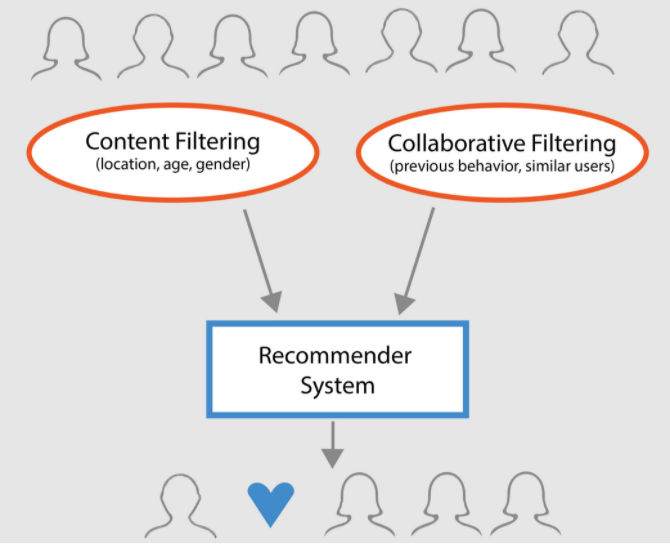

**Content Based:**

Content Based movie recommender systems suggest items based on similarity to a movie that they already positively rated/interacted with. In the context of movies, such a system could use features such as director, cast, genre or description of a movie to make recommendations.

The features we collected for the movies, which we have stored in the **key_word** columns are:
- title_cast
- director
- plot_keywords
- genre
- title
- production year

In [18]:
def content_generate_top_N_recommendations(movie_title, N=10):
    # Convert the string book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_title]
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(cosine_sim_authTags[b_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes 
    movie_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return titles.iloc[movie_indices]

In [19]:
content_generate_top_N_recommendations("Jumanji", N=10)

10398                                           Zathura
2002                                       Return to Oz
2307                             Santa Claus: The Movie
10715    Brothers Lionheart, The (Bröderna Lejonhjärta)
2070                             NeverEnding Story, The
986                            Escape to Witch Mountain
1953                 Darby O'Gill and the Little People
24008                  Journey to the Beginning of Time
15233                               Alice in Wonderland
Name: title, dtype: object

Due to computational errors, predicting ratings using the content based was not achieved.

## **Collaborative Filtering:**¶
Collaborative filtering movie recommender systems are said to be more widely used and make recommendations to users based on the similarity between users, in this case it would be the recommendation of a movie or the likely prediction a user could rate a movie based on the ratings of similar users.

Though they are widely used in the industry, one of the drawbacks of collaborative filtering is the so called cold start problem when it comes to new users, as the system does not have sufficient data on the user to make accurate predictions.

Unlike content based methods, collaborative algorithms return more varied results, enabling the business to introduce users to new types of content, hence increasing viewage and profit. It is for this reason that we use Collaborative filtering as our main approach. The tested models are all implemented from sklean's surprise package. The algorithms are tested below and their results summarised in the table in the comet section.

Similarity Measure

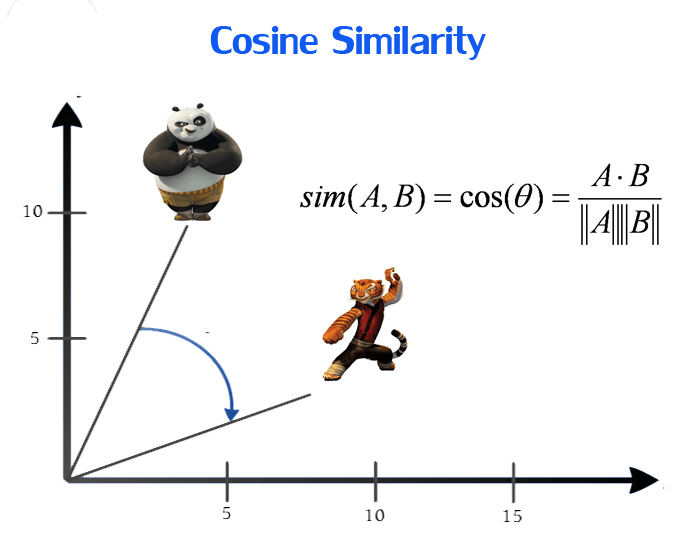

**The KNNBasic is a basic nearest-neighbor based collaborative filtering algorithm derived from the basic nearest-neighbor approach.**



In [15]:
# Define sample size of 500 000 taken from train dataset
# The samples are taken without replacement
train_sample = train.sample(n = 500000, replace = False)
# Drop the timestamp column as it is not needed
data = train_sample.drop(['timestamp'], axis = 1)
# Define the Reader object by specifying the rating scale in the dataset
#reader = Reader(rating_scale=(0.5, 5)) #line_format='user item rating') 
reader = Reader(rating_scale=(data['rating'].min(), data['rating'].max()))
# Load the dataset from the pandas dataframe
data2 = Dataset.load_from_df(data, reader)

#Splitting dataset into train and validation sets
train_set, val_set = train_test_split(data2, test_size=0.15, random_state=42)

In [18]:
# Modeling
kSplit = model_selection.split.KFold(n_splits=5, shuffle=True)

sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }

collabKNN = KNNBasic(k=40, sim_options=sim_options)

rmseKNN = []
rmseSlope = []

for trainset, testset in kSplit.split(data2):  # iterate through the folds
    collabKNN.fit(trainset)
    predictionsKNN = collabKNN.test(testset)
    # get root means squared error
    rmseKNN.append(rmse(predictionsKNN, verbose=True))

# Dictionary for the data to log for KNN basic model
params = {'k': 40, 'sim_options': {'name': 'cosine', 'user_based': False},
          'model_type': 'KNN_basic'}
metrics = {'RMSE': rmse(predictionsKNN, verbose=True)}

# Log the parameters and results for the KNN basic model
experiment.log_parameters(params)
experiment.log_parameters(metrics)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1322
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1360
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1302
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1353
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1405
RMSE: 1.1405


In [19]:
# Modeling
kSplit = model_selection.split.KFold(n_splits=5, shuffle=True)
coClus = CoClustering(n_cltr_u=4,n_cltr_i=4,n_epochs=25)
rmseCo = []
for trainset, testset in kSplit.split(data2):  # iterate through the folds
    coClus.fit(trainset)
    predictionsCoClus = coClus.test(testset)
    # get root means squared error
    rmseCo.append(rmse(predictionsCoClus, verbose=True))

# Dictionary for the data to log for CoClustering model
params = {'user_cluster': 4, 'item_cluster': 4,
          'n_ephocs': 25, 'model_name': 'CoClustering'}
metrics = {'RMSE': rmse(predictionsCoClus, verbose=True)}

# Log the parameters and results for the CoClustering model
experiment.log_parameters(params)
experiment.log_parameters(metrics)

RMSE: 1.0622
RMSE: 1.0600
RMSE: 1.0657
RMSE: 1.0637
RMSE: 1.0673
RMSE: 1.0673


In [20]:
# Modeling
kSplit = model_selection.split.KFold(n_splits=5, shuffle=True)
BLO = BaselineOnly()
rmseBLO = []
# iterate through the folds.
for trainset, testset in kSplit.split(data2):
    BLO.fit(trainset)
    BLOPreds = BLO.test(testset)
    # get root means squared error
    rmseBLO.append(rmse(BLOPreds, verbose=True))

# Dictionary for the data to log for BLO model
paramns = {'model_name': 'BaseLineOnly'}
metrics = {'RMSE':rmse(BLOPreds, verbose=True)}

# Log the parameters and results for the BLO model
experiment.log_parameters(params)
experiment.log_parameters(metrics)

Estimating biases using als...
RMSE: 0.9330
Estimating biases using als...
RMSE: 0.9291
Estimating biases using als...
RMSE: 0.9325
Estimating biases using als...
RMSE: 0.9321
Estimating biases using als...
RMSE: 0.9317
RMSE: 0.9317


In [21]:
# Modelling
kSplit = model_selection.split.KFold(n_splits=5, shuffle=True)
NMF = NMF()
rmseNMF = []
for trainset, testset in kSplit.split(data2): #iterate through the folds.
    NMF.fit(trainset)
    NMFPreds = NMF.test(testset)
    rmseNMF.append(rmse(NMFPreds,verbose=True))#get root means squared error

    
# Dictionary for the data to log for the NMF model
params = {'model_name': 'NMF'}
metrics = {'RMSE': rmse(NMFPreds,verbose=True)}

# Log the parameters and results for the NMF model
experiment.log_parameters(params)
experiment.log_parameters(metrics)

RMSE: 1.0842
RMSE: 1.0818
RMSE: 1.0842
RMSE: 1.0835
RMSE: 1.0908
RMSE: 1.0908


In [22]:
# Define the SVD algorithm class
svd_algo = SVD()
# Fitting the model on the train_set
svd_algo.fit(train_set)
# Predicting on the validation set
svd_predictions = svd_algo.test(val_set)
# Calculating the RMSE of the predictions
rmse(svd_predictions)

# Dictionary for the data to log for SVD model
params = {'model_name': 'SVD'}
metrics = {'RMSE': rmse(svd_predictions)}

# Log the parameters and results for the SVD model
experiment.log_parameters(params)
experiment.log_parameters(metrics)

RMSE: 0.9363
RMSE: 0.9363


In [23]:
rating_scale = Reader(rating_scale=(0.5, 5))
train_df = Dataset.load_from_df(train.drop(['timestamp'], axis=1),rating_scale)

# Training and validation set split for hypertuning
train_set, val_set = train_test_split(train_df,
                                      test_size=0.008,
                                      random_state=42)

# Modelling of the SVD hypertuning
DataLux_SVD = SVD(n_factors=160, 
                     lr_all=0.0085,
                     reg_all=0.02,
                     n_epochs=20,
                     init_std_dev=0.01)
DataLux_SVD.fit(train_set)

# Predicting on the validation set
DataLux_SVD_predictions = DataLux_SVD.test(val_set)

# Convert the predictions to dataframe
#test = pd.DataFrame(predictions)
rmse(DataLux_SVD_predictions)

# Dictionary for the data to log for the SVD tuned model
params = {'model_name': 'DataLux_SVD'}
metrics = {'RMSE': rmse(DataLux_SVD_predictions)}

# Log the parameters and results for the SVD tuned model
experiment.log_parameters(params)
experiment.log_parameters(metrics)

RMSE: 0.7884
RMSE: 0.7884


In [24]:
DataLux_pred = [DataLux_SVD.predict(row.userId,
                                         row.movieId) for idx,row in test.iterrows()]

# Converting the predictions to a dataframe
DataLux_pred_df = pd.DataFrame(DataLux_pred)

In [25]:
#renaming the fields of the prediction dataframe
DataLux_pred_df.drop(['r_ui', 'details'], axis=1, inplace=True)
DataLux_pred_df =DataLux_pred_df.rename(columns={'uid':'userId',
                                                          'iid':'movieId',
                                                          'est':'rating'})
DataLux_pred_df.head()

,userId,movieId,rating
0,1,2011,2.939023
1,1,4144,4.134720
2,1,5767,3.824683
3,1,6711,4.207720
4,1,7318,2.821045


In [26]:
# Concatenating each userId and movieId to a single Id column for submission
DataLux_pred_df['Id'] =  DataLux_pred_df['userId'].astype(str).str.zfill(1) + '_' + DataLux_pred_df['movieId'].astype(str).str.zfill(1)

In [27]:
DataLux_predictions = DataLux_pred_df[['Id','rating']]
DataLux_predictions.head()

,Id,rating
0,1_2011,2.939023
1,1_4144,4.134720
2,1_5767,3.824683
3,1_6711,4.207720
4,1_7318,2.821045


In [28]:
# Save submission as csv
DataLux_predictions.to_csv('submission_file.csv', index_label = False, index = False)

<a id="nine"></a>
## 9. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |


---

###  Rating Prediction

As motivated previously, in some cases we may wish to directly calculate what rating a user _would_ give a book that they haven't read yet. 

We can modify our content-based filtering algorithm to do this in the following manner: 

   1. Select a reference user from the database and a reference item (movie) they have _not_ rated. 
   2. For the user, gather the similarity values between the reference item and each item the user _has_ rated. 
   3. Sort the gathered similarity values in descending order. 
   4. Select the $k$ highest similarity values which are above a given threshold value, creating a collection $K$. 
   5. Compute a weighted average rating from these values, which is the sum of the similarity values of each item multiplied by its assigned user-rating, divided by the sum of the similarity values. This can be expressed in formula as:
   
   $$ \hat{R}_{ju} = \frac{\sum_{i \in K} s_{ij} \times r_{iu}}{\sum_{i \in K} s_{ij}}   $$
   
   where $\hat{R}_{ju}$ is the weighted average computed for the reference item $j$ and reference user $u$, $K$ is the collection of items, $s_{ij}$ is the similarity computed between items $i$ and $j$, and $r_{iu}$ is the known rating user $u$ has given item $i$.
   6. We return the weighted average $\hat{R}_{ju}$ as the prediction for our reference item.
   
   
We implement this algorithmic process in the function below:

In [29]:
# List of the rmse scores of the different model
rmse_scores = [1.14, 1.06, 0.93, 1.09,  0.93, 0.78]
models = ['KNN_Basic', 'CoClustering', 'Baselineonly', 'NMF', 'SVD', 'DataLux_SVD']

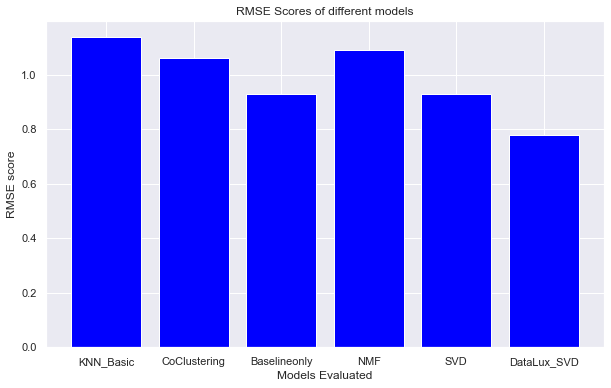

In [31]:
plt.figure(figsize=(10,6))
# Plot bar chart with data points
plt.bar(models, rmse_scores, color = 'blue')
plt.title('RMSE Scores of different models')
plt.xlabel('Models Evaluated')
plt.ylabel('RMSE score')


# Display the plot
plt.show()

<a id="ten"></a>
## 10. Model Explanations & Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |


---

DataLux_Singular Value Decomposition (SVD) and Matrix Factorization models are used to predict the end user's rating on items yet to be consumed by users. 

In this project, We have utilized the results of singular value decomposition (SVD) to predict how users will rate movies  yet to be seen by them.

SVD is decomposition of a matrix R which is the utility matrix with m equal to the number of users and m number exposed movies ratings into the product of three matrices:

* U is a left singular orthogonal matrix, representing the relationship between users and latent factors (Hopcroft & Kannan, 2012)

* Σ is a diagonal matrix (with positive real values) describing the strength of each latent factor

* V(transpose) is a right singular orthogonal matrix, indicating the similarity between items and latent factors.

![2020/02/svd2.png](https://www.dataminingapps.com/wp-content/uploads/2020/02/svd2.png)

The general goal of SVD (and other matrix factorization methods) is to decompose the matrix R with all missing values and multiply its components, U, Σ and V once again. As a result, there are no missing values and it is possible to recommend each user movies (items) they have not seen yet.

**CONLUSION**
The ability to recommend relevant products or services to users can be very profitable for a company. Hence, it is so common to find to find recommender systems being run by many companies. In this notebook, we build a recommender system using the pandas and skit learn's library.

To be able to build the algorithm, the needed to explore the dataset we had and draw insights on them. For the Collaborative recommender system, the userId, movieId and ratings columns from the rating dataset was enough to build. 

For the content-based model, there was a need create new feature from title_cast, director, plot_keywords and genres columns from the different datasets. The provide content to create our features.
Building and evaluating the content-based and collaborative based filtering, the SVD model for the colaborative based approach performed extremely well. The DataLux_SVD model with parameters n_factors=160, lr_all=0.0085, reg_all=0.02, n_epochs=20 and init_std_dev=0.01 performed the best with an rmse score of 0.788.

<a id="eleven"></a>
## 11. Comet session
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |


---

This was used to Manage and optimize the entire ML lifecycle, from experiment tracking to model production monitoring.

In [32]:
# Summary of the comet experiments
rmse_scores = [1.14, 1.06, 0.93, 1.09,  0.93, 0.78]
models = ['KNN_Basic', 'CoClustering', 'Baselineonly', 'NMF', 'SVD', 'DataLux_SVD']
comet_scores = pd.DataFrame({'RMSE': rmse_scores}, index = models)
comet_scores.sort_values(by='RMSE')

,RMSE
DataLux_SVD,0.78
Baselineonly,0.93
SVD,0.93
CoClustering,1.06
NMF,1.09
KNN_Basic,1.14


In [33]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/engrchyke/team-es3-unsupervised-learning/88accc0071f6426381e8e0d41881d6c4
COMET INFO:   Parameters:
COMET INFO:     RMSE         : 0.78839970445715
COMET INFO:     item_cluster : 4
COMET INFO:     k            : 40
COMET INFO:     model_name   : DataLux_SVD
COMET INFO:     model_type   : KNN_basic
COMET INFO:     n_ephocs     : 25
COMET INFO:     sim_options  : {"name": "cosine", "user_based": false}
COMET INFO:     user_cluster : 4
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages           : 1
CO

Below is the pickle file for the model.

In [ ]:
pickle.dump(model, open(save_path,'wb'))
model_save_path = "team-es3-unsupervised-learning1.pkl"
with open(model_save_path, 'wb') as file:
    pickle.dump(DataLux_SVD, file)

<a id="twelve"></a>
## 12. Appendix
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |


---

1. Problem statement: https://www.kaggle.com/competitions/edsa-movie-recommendation-2022
2. What is Exploratory Data Analysis?: https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
3. Feature transformation of text data :https://medium.com/swlh/feature-transform-of-text-data-nlp-c6ccedbeb3cc 
4. comet: https://www.comet.ml/site/